In [1]:
%matplotlib inline

In [2]:
import os
from astropy.visualization import simple_norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 30


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["axes.formatter.use_mathtext"]=True

from scipy.stats import norm, truncnorm, uniform
import matplotlib.pyplot as plt

from matplotlib.patches import Patch
import corner

%matplotlib inline
import re
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy as ap
from astropy.io import ascii

import astropy.table as at
import astropy.units as u
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=72, Om0=0.3)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### Even though you are submitting these with `git` and this file tells you to rename it, and you should be pushing to a dedicated folder with your username, please also stick your name in this file here, so there's extra redundancy. 

The point of this assignment is to:
- to make sure you have a sense of fluxes, magnitudes and distances as a function of redshift
- get familiar with drawing random numbers from a distribution, making cuts on your data
- modeling in the presence of systematic effects and the resulting biases you'll encounter

# Q1. The $k$-correction in the sub-mm and the optical (60 pts)

You know how to calculate the flux synthetically in some band, but what about comparing the flux of the same class of objects at different redshifts. Necessarily, you'll have to compare the rest-frame flux with the observer frame flux further in the red at some redshift $z$ because the Universe is expanding and frequency of photons is shifting. 

To do this, you need the "$k$-correction" which is nicely summarized in Hogg et al. 2002: https://arxiv.org/abs/astro-ph/0210394
(You might start by looking at Eqn. 12, and comparing it to the synthetic integrals for the flux you implemented in Homework 1)

As we discussed in class (or as you might know if you've listened to a talk from Prof. Joaquin Vieira) galaxies have an interesting effect where the flux density $F_\nu$ from about 250 $\mu m$ becomes roughly constant over a large range in redshift because you climb the Rayleigh-Jeans tail as you increase redshift, which compensates for the decrease in the flux density because of increasing distance. In the optical, you have no such luck, and indeed, depending on the class of galaxy, the $k$-correction means that galaxies in a fixed observer band might seem even fainter than you might expect from the inverse square law. 

In particular, the $k$-correction goes negative. 

In this problem, you'll implement the k-correction (reuse the code from HW1 and simplify Eqn 12).

I've included an SED of a galaxy ```aless_average_seds.dat``` from Elisabete de Cunha (you can read about it here: http://astronomy.swinburne.edu.au/~ecunha/ecunha/SED_Templates.html) with this homework. The columns are wavelength (in microns), average $F_\nu$ (in mJy), and upper and lower credible regions on the flux density.

Your mission is to make three plots (15 points each for the plot):
 

Hint: Astropy has a units module to help convert between different units and an equivalencies option particularly to convert between wavelengths and frequencies (https://docs.astropy.org/en/stable/units/equivalencies.html). You can try to do it by hand, but if you mess it up, you'll get rubbish. It also has a cosmology module to compute luminosity distance as a function of redshift - you can assume a Flat $\Lambda$ CDM cosmology. 

### This is not actually all that much code if you break it into a few functions.

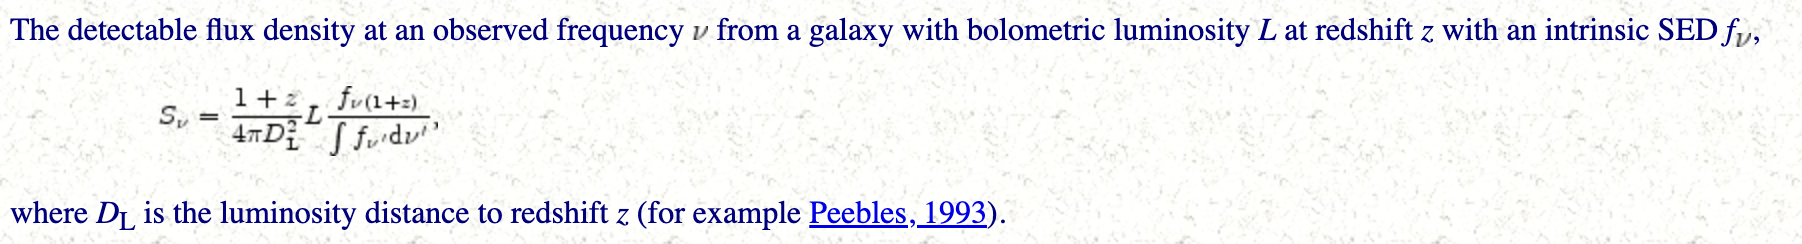
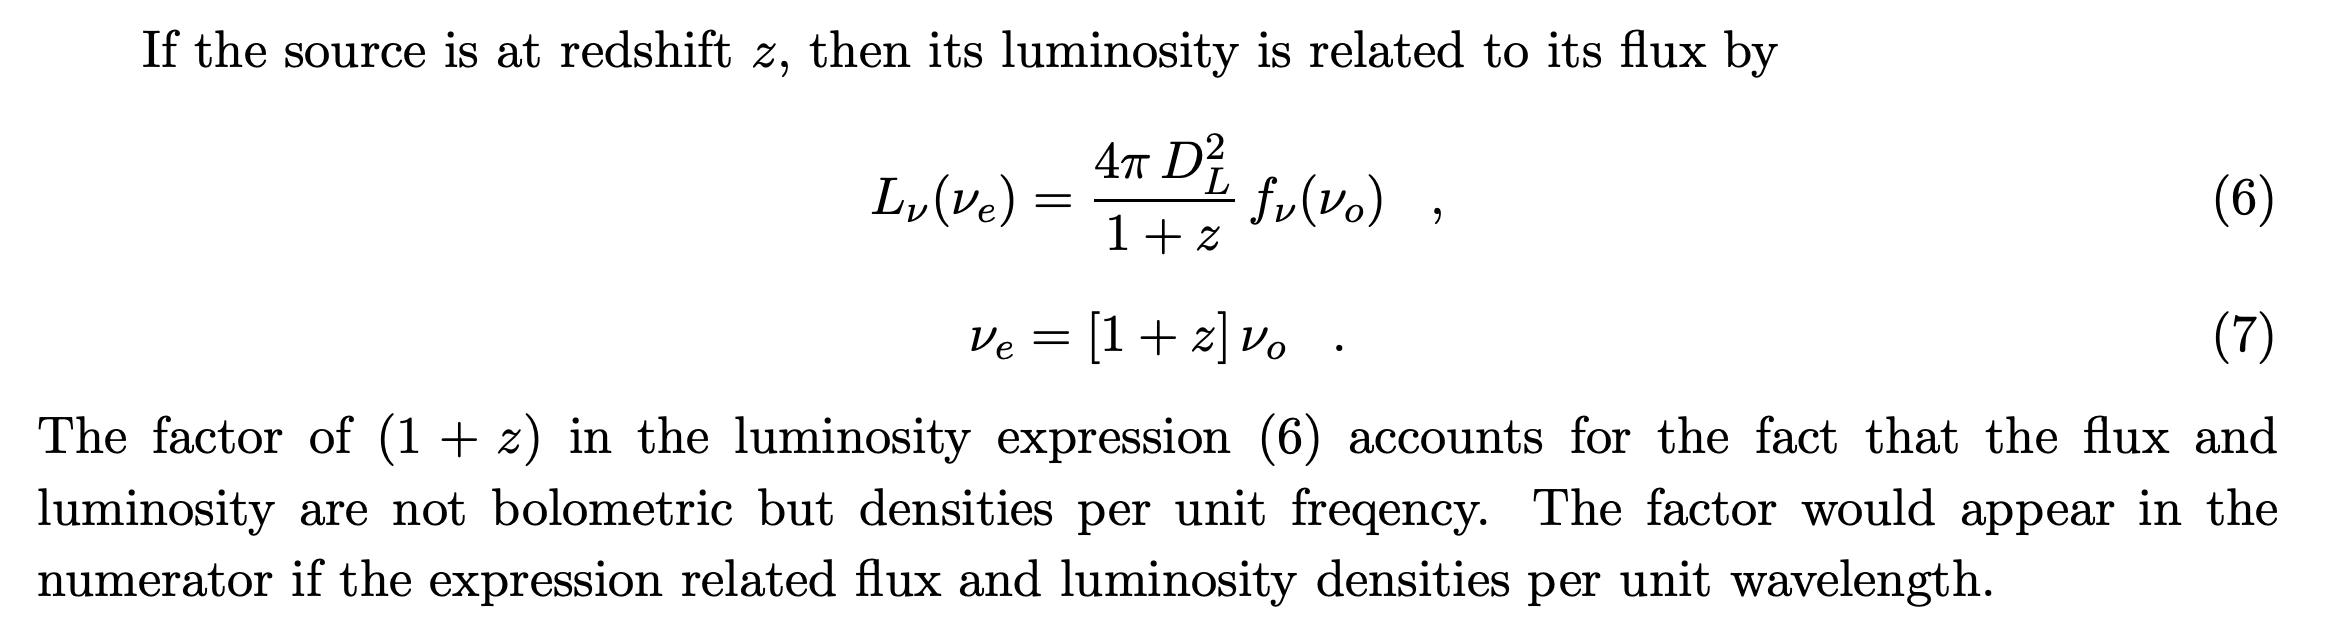

In [3]:
# !wget http://astronomy.swinburne.edu.au/~ecunha/ecunha/SED_Templates_files/aless_average_seds.dat

### Figure 1.1
- Fig 1. should plot the flux density in mJy of this SED as a function of redshift (see here: https://ned.ipac.caltech.edu/level5/Sept04/Blain/Blain2_5.html) in common bands - assume perfectly rectangular bands with a fixed 3  micron bandwidth around the central wavelengths shown in the above figure. (Hint: this doesn't need you to actually compute the $k$-correction explicitly yet, but you will need to be careful about units and show that you know how to redshift and dim an SED). Evaluate this on a grid of redshift from $z$=1 to $z$=8 (inclusive) with $\Delta z$=0.25 spacing.

In [4]:
from astropy import constants as c, units as u

In [5]:
data = at.Table.read('data/hw2/aless_average_seds.dat', format='ascii', names=['wave','fnu', 'fnu_bright', 'fnu_faint'], data_start=1).to_pandas()
data['nu'] = np.array(data['wave'])*(u.micron).to(u.Hz, equivalencies = u.spectral())

fnu = np.array(data['fnu'])*u.mJy
fnu_si = fnu.to(u.W/(u.m**2*u.Hz))
fl = fnu_si*c.c.to(u.micron/u.s)/((np.array(data['wave'])*(u.micron))**2)#
data['f_lambda'] = fl.to(u.W/(u.m**2*u.micron))

In [6]:
data

,wave,fnu,fnu_bright,fnu_faint,nu,f_lambda
0,0.00940,0.00000,0.00000,0.00000,2.818049e+12,0.000000e+00
1,0.00960,0.00000,0.00000,0.00000,2.878008e+12,0.000000e+00
2,0.00980,0.00000,0.00000,0.00000,2.937966e+12,0.000000e+00
3,0.01000,0.00000,0.00000,0.00000,2.997925e+12,0.000000e+00
4,0.01019,0.00000,0.00000,0.00000,3.054885e+12,0.000000e+00
...,...,...,...,...,...,...
13110,228107.81250,0.09192,0.10212,0.02797,6.838500e+19,5.296030e-27
13111,231814.25000,0.09301,0.10333,0.02831,6.949616e+19,5.188838e-27
13112,235580.90625,0.09414,0.10459,0.02864,7.062538e+19,5.085278e-27
13113,239408.76562,0.09525,0.10582,0.02897,7.177294e+19,4.982021e-27


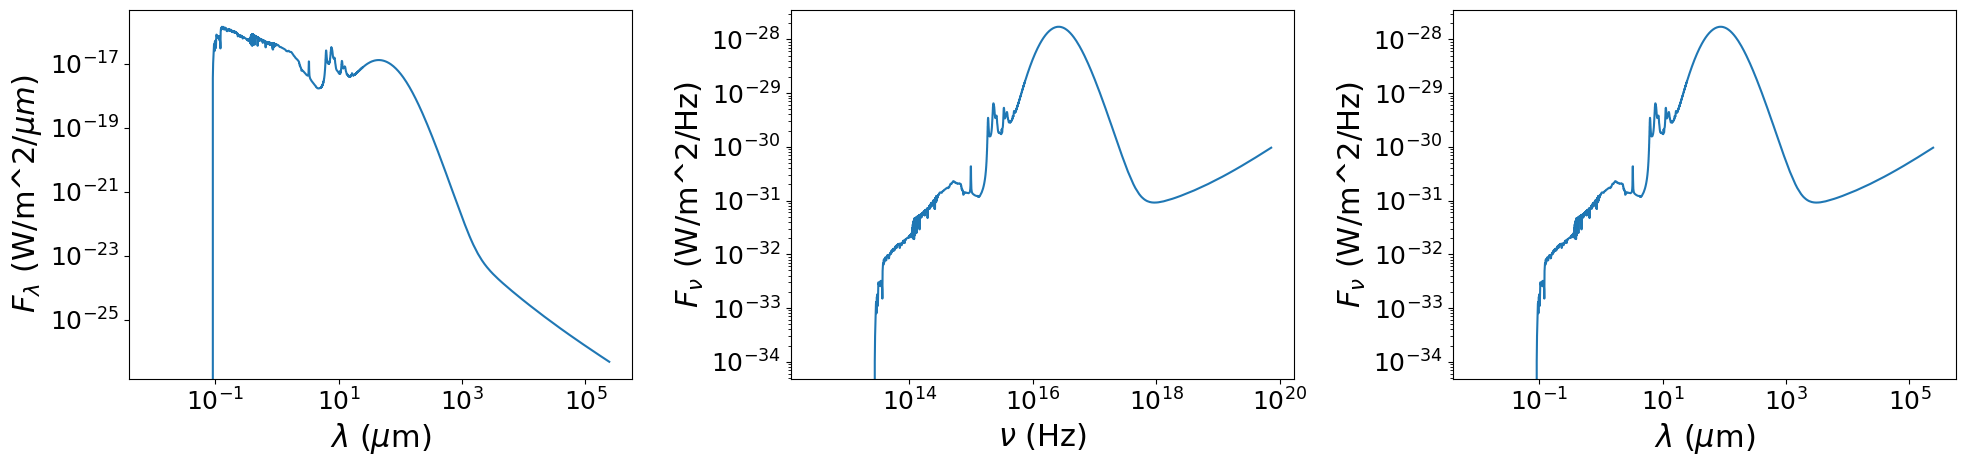

In [7]:
# PLOT INPUT DATA
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].plot(data['wave'], data['f_lambda'])
ax[0].set_xlabel("$\lambda$ ($\mu$m)")
ax[0].set_ylabel("$F_{\lambda}$ (W/m^2/$\mu m$)")
ax[1].plot(data['nu'], fnu_si)
ax[1].set_ylabel("$F_{\\nu}$ (W/m^2/Hz)")
ax[1].set_xlabel('$\\nu$ (Hz)')
ax[2].plot(data['wave'], fnu_si)
ax[2].set_ylabel("$F_{\\nu}$ (W/m^2/Hz)")
ax[2].set_xlabel("$\lambda$ ($\mu$m)")
for a in ax:
    a.set_xscale('log')
    a.set_yscale("log")
fig.tight_layout()

In [8]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=72 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

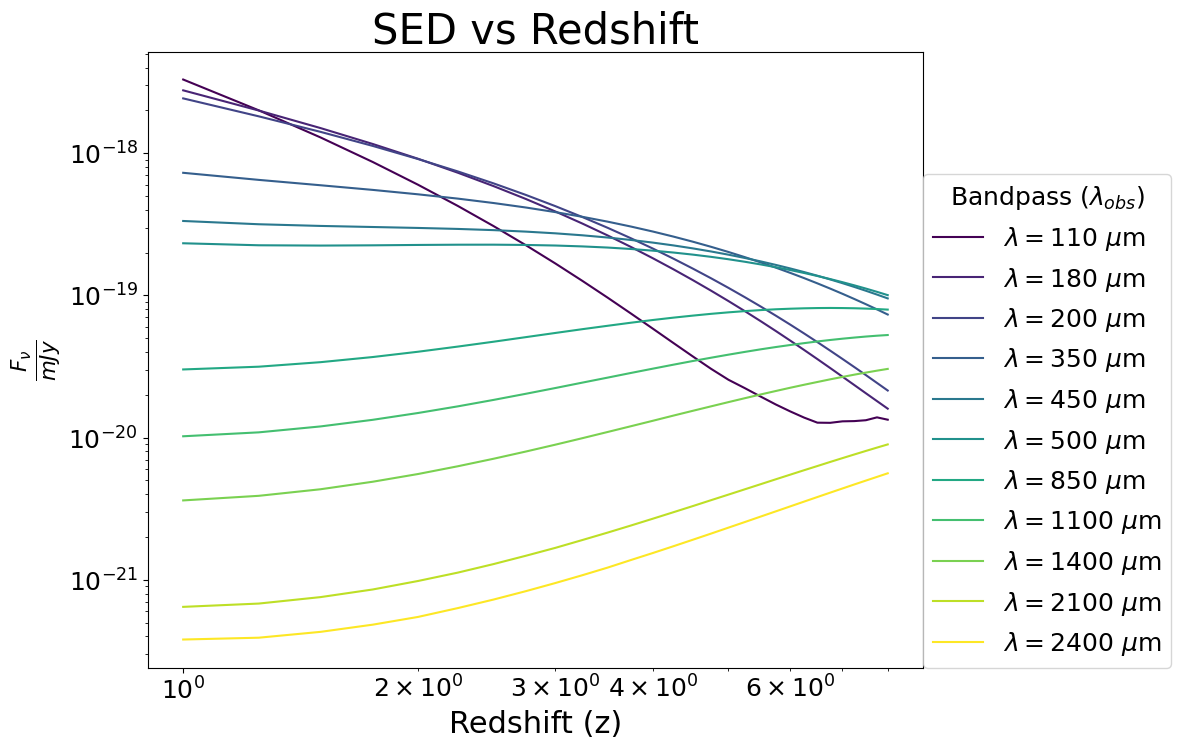

In [9]:
plt.figure(figsize=(10,8))
wave_centers = np.array([110,180, 200, 350, 450, 500, 850, 1100, 1400, 2100, 2400])
cmap = plt.get_cmap('viridis')
for wavei in range(len(wave_centers)):
    wave = wave_centers[wavei]
    redshifts = np.arange(1, 8.25, 0.25)
    flux_z = np.array([])
    for z in redshifts:
        data = data.sort_values(by='nu', ascending=True)
        redshift_wave = wave/(1+z) # wave --> observer frame; redder in emitted frame
        freq_low = (redshift_wave - 1.5)*(u.micron).to(u.Hz, equivalencies = u.spectral())
        freq_high = (redshift_wave + 1.5)*(u.micron).to(u.Hz, equivalencies = u.spectral())
        pass_freq = np.linspace(freq_low, freq_high, 100000)
        flux_in_passband = np.interp( pass_freq , data['nu'], data['fnu'], left=0., right=0.)
        n = np.trapz(flux_in_passband/pass_freq,x=pass_freq)
        redshift_flux = np.array(( n * (1+z) )/((cosmo.luminosity_distance(z).to(u.pc))/10)**2)
        flux_z = np.append(flux_z, redshift_flux)
    ax = plt.plot(redshifts,flux_z, color=cmap(wavei/10), label='$\lambda = $'+f'{wave_centers[wavei]} $\mu$m')
    plt.legend(loc=(1,0),title='Bandpass ($\lambda_{obs}$)')
    plt.xlabel("Redshift (z)")
    plt.ylabel("$ \\frac {F_{\\nu}} {mJy}$")
    plt.title("SED vs Redshift")
    plt.yscale('log')
    plt.xscale('log')

### Figure 1.2

- Fig 2. should plot the flux density (in mJy) of the SED as a function of wavelength in microns (see the 2nd animation here: http://www.as.utexas.edu/~cmcasey/animated.html) over the same redshift grid (you can use $\Delta z$=0.50 to make it less cluttered if you like) and overplot the sub-mm bands for BICEP2 (http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse&gname=BICEP&gname2=BICEP2&asttype=) 

In [10]:
bicep_bands = ['2.95', '2.150', '2.220']
bicep_file = [f"data/hw2/BICEP_BICEP{i}GHz_rj.dat" for i in bicep_bands]
band_to_data =dict(zip(bicep_bands, bicep_file))
bicep_data = pd.DataFrame()
for name in bicep_bands:
    file = band_to_data[name]
    d = ascii.read(file, names=[f'{name}_wavelength', f'{name}_passband']).to_pandas()
    bicep_data = pd.concat([bicep_data, d], axis=1)

In [11]:
bicep_data

,2.95_wavelength,2.95_passband,2.150_wavelength,2.150_passband,2.220_wavelength,2.220_passband
0,24694601.15,0.00052,15912550.85,0.00057,10009764.87,0.00150
1,24817256.46,0.00053,15963389.67,0.00071,10033550.59,0.00156
2,24941136.27,0.00066,16014554.38,0.00082,10057449.61,0.00168
3,25066259.03,0.00085,16066048.12,0.00096,10081462.76,0.00181
4,25192643.53,0.00098,16117874.09,0.00122,10105590.84,0.00186
...,...,...,...,...,...,...
164,NaN,NaN,NaN,NaN,16372260.28,0.00460
165,NaN,NaN,NaN,NaN,16435990.02,0.00433
166,NaN,NaN,NaN,NaN,16500217.84,0.00360
167,NaN,NaN,NaN,NaN,16564949.61,0.00291


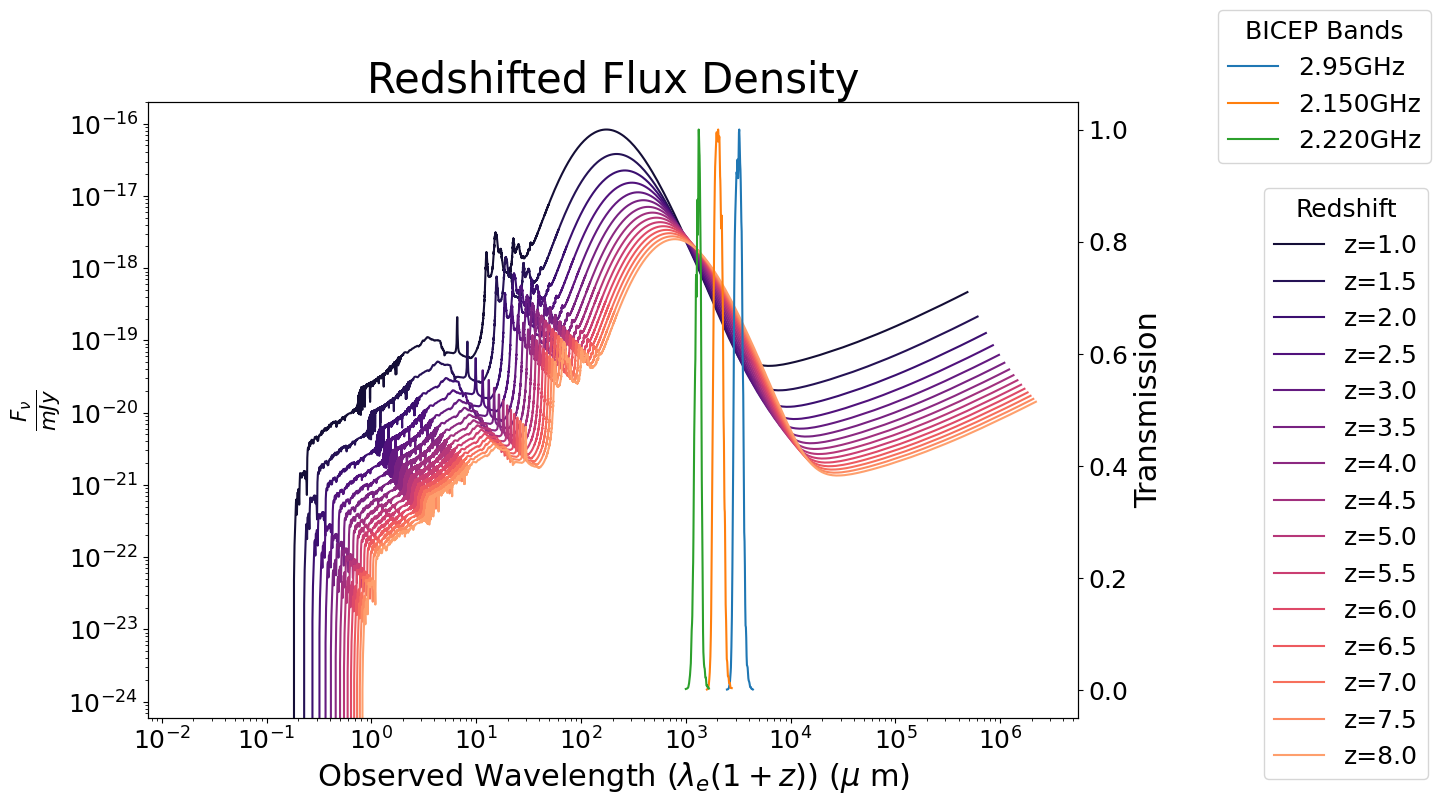

In [12]:

redshifts = np.arange(1, 8.25, 0.5)
fig, ax = plt.subplots(figsize=(12,8))
cmap = plt.get_cmap('magma')
for z in redshifts:
    redshift_flux = np.array(( data['fnu'] * (1+z) )/((cosmo.luminosity_distance(z).to(u.pc))/10)**2)
    ax.plot(data['wave']*(1+z),redshift_flux, c=cmap(z/10), label=f'z={z}')
    ax.legend(loc=(1.2,-0.1),title='Redshift')
    ax.set_xlabel("Observed Wavelength ($\lambda_{e} (1+z)$) ($\mu$ m)")
    ax.set_ylabel("$ \\frac {F_{\\nu}} {mJy}$")
    ax.set_title("Redshifted Flux Density")
    ax.set_yscale('log')
    ax.set_xscale('log')
ax1= ax.twinx()
for name in bicep_bands:
    ax1.plot(bicep_data[f'{name}_wavelength']*1e-4, bicep_data[f'{name}_passband'],label=f'{name}GHz' )
    ax1.set_ylabel("Transmission")
    ax1.legend(loc=(1.15,0.9), title='BICEP Bands');

####  We can see how the sub mm bands overlap in a region where the redshifted flux density is pretty constant for all redshifts.

### Figure 1.3
- Fig 3. should plot the $k$-correction (in magnitudes) itself for LSST giy bands as a function of redshift between $z$=0. and $z=2$ in $\Delta z$=0.01 steps (you can use whatever linestyle you like to join the lines, but make sure you use a different color for each of the observer frames). The Hogg et al. 2002 will need you to specify a rest-frame filter for each of the observer frame filters. Use the same LSST ugrizy filter set and determine which one is at the closest effective wavelength to the observer frame filter's effective wavelength at each redshift. If there is no band that maps well to an observer frame band (i.e. the the rest-frame filter has redshifted out of the observer frame filter) stop computing the $k$-correction for that filter.

In [13]:
passbands = ['u', 'g', 'r', 'i', 'z', 'y']
passband_files = [f"data/LSST_LSST.{i}_filter.dat" for i in passbands ]
passband_to_file = dict(zip(passbands, passband_files))

passband_data = pd.DataFrame()
for name in passbands:
    file = passband_to_file[name]
    d = ascii.read(file, names=[f'{name}_wavelength', f'{name}_passband']).to_pandas()
    passband_data = pd.concat([passband_data, d], axis=1)

# convert everything to micron
for p in passbands:
    passband_data[f'{p}_wavelength'] = passband_data[f'{p}_wavelength']/1e4

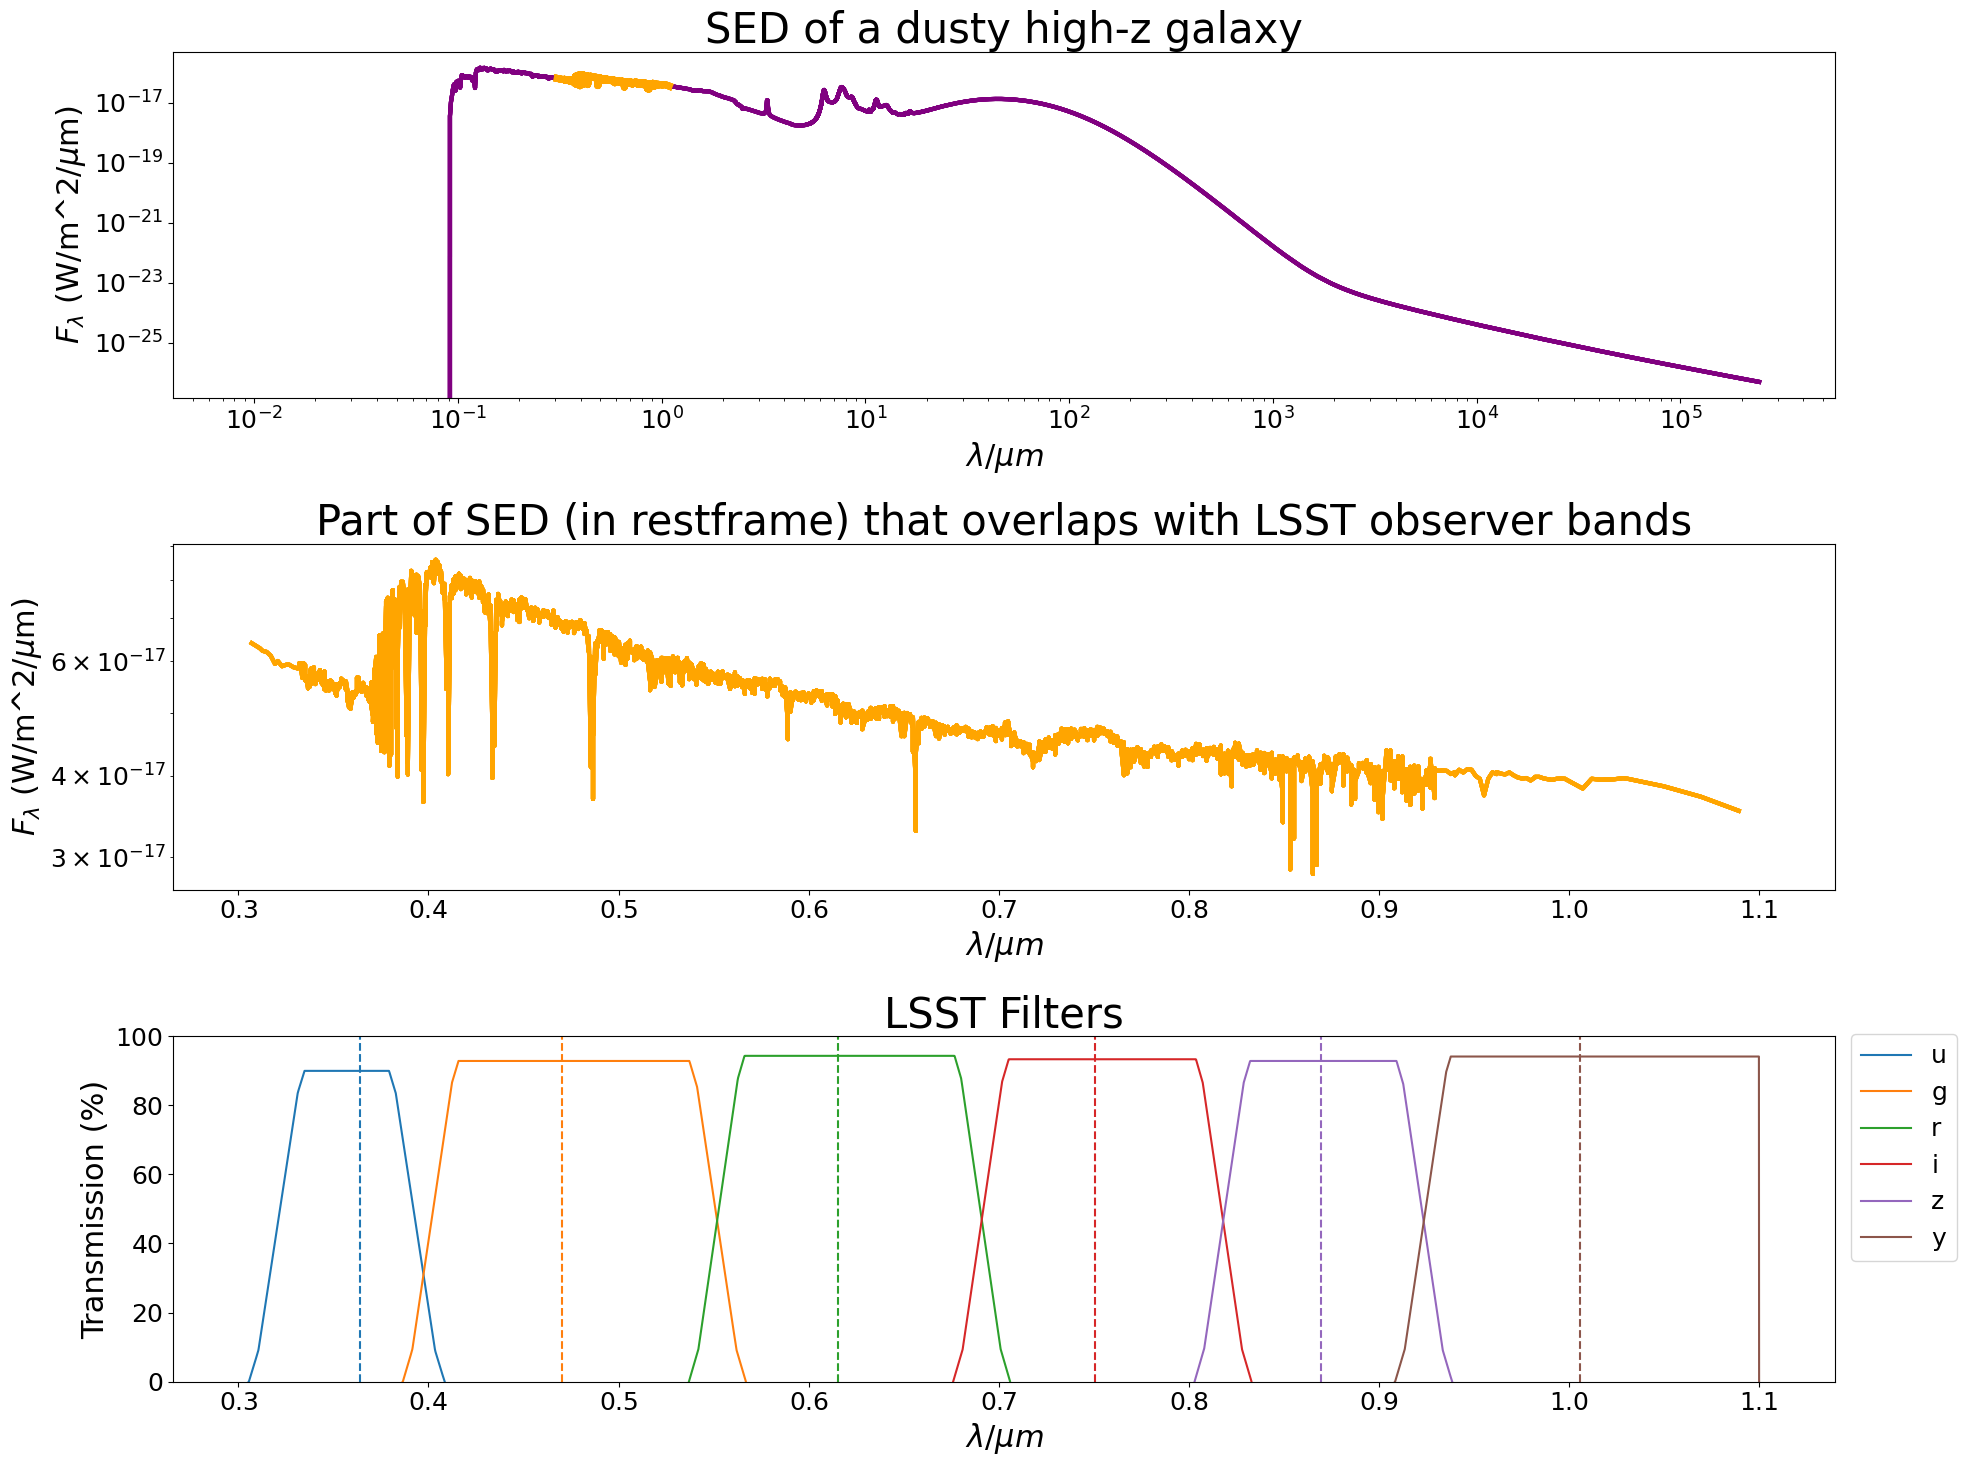

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))
wave = np.array(data['wave'])*(u.micron)
# from http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse&gname=LSST&asttype=

effvals = np.array([3641.17, 4704.08, 6155.82, 7504.64, 8695.51, 10056.62])/1e4 # microns
eff_wavelengths = dict(zip(passbands, effvals))

# wave_ang = wave.to(u.Angstrom)
for p in passbands:
    ax[0].plot(wave, data['f_lambda'], lw=3,color='purple')
    
    lsst_overlap = ((wave.value>=np.min(passband_data[f'u_wavelength'])) & (wave.value <=np.max(passband_data['y_wavelength'])))
    ax[0].plot(wave[lsst_overlap], data['f_lambda'][lsst_overlap], lw=5,color='orange')
    for a in ax:
        a.set_xlabel("$\lambda / \mu m$")
    for a in ax[:2]:
        a.set_ylabel("$F_{\lambda}$ (W/m^2/$\mu$m)")
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_title('SED of a dusty high-z galaxy')
    ax[1].plot(wave[lsst_overlap], data['f_lambda'][lsst_overlap], lw=3,color='orange')
    ax[1].set_yscale('log')
    line, = ax[2].plot(passband_data[f'{p}_wavelength'], 100*passband_data[f'{p}_passband'], label=p)
    ax[2].legend(loc=(1.01,0.35))
    ax[2].set_title("LSST Filters")
    ax[2].set_ylabel("Transmission (%)")
    ax[2].set_ylim(0,100)
    ax[2].axvline(eff_wavelengths[p], ls='--', color=line.get_color())
    # ax[2].axvline(np.median(passband_data[f'{p}_wavelength']), ls='--', color='k',alpha=0.5)
    ax[1].set_title("Part of SED (in restframe) that overlaps with LSST observer bands")
    
    ax[1].set_xticks(ax[2].get_xticks())
    ax[1].set_xlim(ax[2].get_xlim())
fig.tight_layout()

Here, the dotted lines show the effective wavelength of each filter taken from the Filter Profile Service database. The effective wavelength is just the central or median wavelength.

In [15]:
def get_F_lambda_AB(wavelength):
    try:
        if wavelength.unit=='angstrom':
            wavelength = wavelength.to(u.micron)
        else:
            pass
    except:
        wavelength = wavelength*(u.micron)
    fnu = 3.631*u.Jansky
    fnu_si = fnu.to(u.W/(u.m**2 * u.Hz))
    c_micron = c.c.to(u.micron/u.s)
    flambda = fnu_si*c_micron/(wavelength**2)
    return flambda

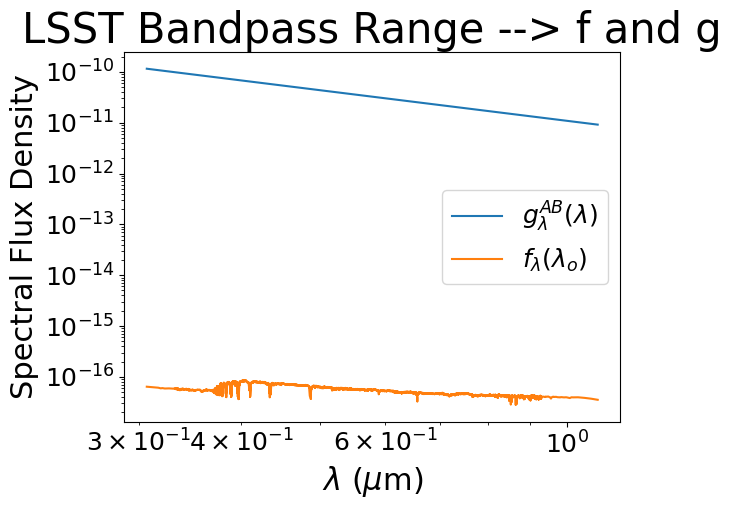

In [16]:
omfg = get_F_lambda_AB(data['wave'])
plt.plot(data['wave'][lsst_overlap], omfg[lsst_overlap], label='$g_{\lambda}^{AB}(\lambda)$')
plt.plot(data['wave'][lsst_overlap], data['f_lambda'][lsst_overlap], label='$f_{\lambda}(\lambda_{o})$')
plt.legend()
plt.ylabel("Spectral Flux Density")
plt.xlabel("$\lambda$ ($\mu$m)")
plt.xscale('log')
plt.yscale('log')
plt.title("LSST Bandpass Range --> f and g");

When we look at an object through passband R, we see light that has reached the earth's surface at that wavelength. If the source emitting this light is very far away, then the light originally emitted by the source contained more energy --> was in another passband.

\begin{equation*}
K_{QR} = -2.5\log_{10}\left[\frac{1}{1+z}\frac{\int{ \lambda_0 f_{\lambda}(\lambda_0)R(\lambda_0) d\lambda_0}}{\int{ \lambda_0 g_{\lambda}^{R}(\lambda_0)R(\lambda_0) d\lambda_0}}\right]\left[\frac{\int{ \lambda_e g_{\lambda}^Q(\lambda_e) Q(\lambda_e) d\lambda_e}}{\int{\lambda_e f_{\lambda}([1+z]\lambda_e) Q(\lambda_e) d\lambda_e}}\right]
\end{equation*}


In [17]:
def redshift_sed(flux_sed, z):
    return np.array(flux_sed/((1+z)*(cosmo.luminosity_distance(z).to(u.pc))/10)**2)
    
def get_q_band(wave):
    effwe = np.nanmedian(wave)
    q_band =  passbands[np.argmin(np.abs(effvals - effwe))]
    return q_band

In [90]:
def get_synthetic_flux(passband, z):
    wave = data['wave']
    flux_sed = data['f_lambda']
    passband_data_slice = passband_data[[f'{passband}_wavelength', f'{passband}_passband']].sort_values(by=f'{passband}_wavelength')
    pass_wave = passband_data_slice[f'{passband}_wavelength']
    if z!=0:
        wave = wave/(1+z)
        passband = get_q_band(pass_wave/(1+z))
        # flux_sed = redshift_sed(flux_sed, z)
        passband_data_slice = passband_data[[f'{passband}_wavelength', f'{passband}_passband']].sort_values(by=f'{passband}_wavelength')
        pass_wave = passband_data_slice[f'{passband}_wavelength']
    
    WA, WB = np.min(pass_wave), np.max(pass_wave)
    ind  = np.where((wave >= WA) & (wave <= WB))[0]
    throughput = passband_data_slice[f'{passband}_passband']
    ptransmission = np.interp(wave[ind], pass_wave, throughput, left=0., right=0.)
    n = np.trapz(wave[ind]*flux_sed[ind]/(1+z)*ptransmission,wave[ind])
    flux_norm = get_F_lambda_AB(wave[ind])
    d = np.trapz(wave[ind]*flux_norm*ptransmission, wave[ind])
    flux_p = n/d
    return flux_p

In [93]:
redshift_arr = np.arange(0, 2.01, 0.01)
flux_sed_gal = data['f_lambda']
flux_sed_ab = get_F_lambda_AB(data['wave'])
k_cors = dict()
for r_pass in ['g','i','y']:
    kpass = []
    for z in redshift_arr:
        k_corr = 2.5 * np.log10( 1/(1+z) * get_synthetic_flux(r_pass, 0) / get_synthetic_flux(r_pass, z))
        kpass.append(k_corr)
    k_cors[r_pass] = kpass



        

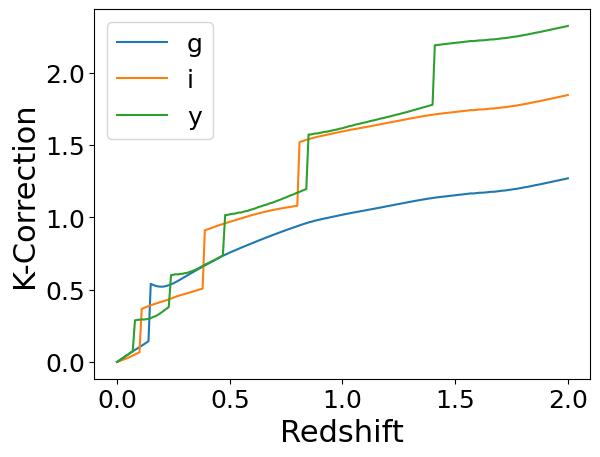

In [94]:
for k in k_cors.keys():
    plt.plot(redshift_arr, np.array(k_cors[k]), label=k)
plt.xlabel("Redshift")
plt.ylabel("K-Correction")
plt.legend()
# there's some issue with my normalization
# ugh it's increasing and you can see the steps but i need to figure out what unit conversion i'm missing
# im turning this in for now 
# this is fake news UGHGHHH


# Q2 - Supernovae and $H_0$ (40 pts - 10 per part)

For this simulation, we will generate a sample of type Ia supernovae. These are special as they have similar intrinsic brightness, so that their apparent flux can be used to measure how far away they are. If their redshift is also measured, the measurements can be used to calculate the expansion rate of the Universe, or Hubble's constant.

We want to understand *how* brightness limits affect the use of type Ia supernovae observations in the measurement of the Hubble constant, $H_0$. To do so, we will use Monte Carlo computations to generate a set of simulated data. 

A subtle effect occurs in this measurement, called Malmquist bias, that can affect the result. The effect is caused by the range of apparent brightness for supernova. Supernova in our simulation have an absolute magnitude of M=-19. 

Assume the supernova have a scatter about their absolute magnitude of approximately 1 magnitude (this is much too large, but it is to exaggerate the effect we'll see). 1-2m class survey telescopes will detect objects as faint as m=21 in about a minute of exposure - treat this is as their reliable detection limit - i.e. sources <= 21 are detected 100% of the time. Sources > 21 are detected with 0% efficiency. This is obviously unrealistic, but it'll suffice for now.

The limiting magnitude corresponds to a distance modulus m-M=5 log10(d/10 pc) of 40, which suggests that supernova can be seen at least as far away as 1000 Mpc. 

(We will assume that over this distance, the SED of SNe Ia are approximately constant so we can happily neglect the $k$-correction, so you will not murder me after you have suffered through Q1)

Assume supernova are formed uniformly throughout *a sphere* with radius r=2500 Mpc. In the data generation part of the simulation, assume that each supernova is receding at a rate v=H0*d, where H0 is 72km/s/Mpc and d is the distance in Mpc. For each supernova you simulate, also create a peculiar velocity array that you can add to the recession velocity by drawing from a Gaussian distribution with mean 0, and standard deviation of 600 km/s. (Hint: "uniformly in a sphere" is definitely a trap and you should think about what you are doing)

1. Create a Monte Carlo program to generate 100 randomly placed supernovae within this volume. Have the program generate the true distances, $d$, to the supernovae. Calculate the mean distance for the supernovae.

2. Now assume each supernovae has a brightness governed by M = -19 +G(1) where G(1) is a random number with Gaussian distribution and standard deviation of one magnitude. Calculate the apparent magnitude of each supernovae using the distance generated in part (1). If m>21, assume the object is too faint to detect and reject it from the sample. Create a plot of magnitude versus distance for all the supernovae. Write out the *average* magnitudes of the original sample and the detected sample. 

3. Generate the velocities (both recession and peculiar) as described earlier. Generate an observed distance ($d'$) by using its apparent magnitude and Hubble’s law, with the *assumption* that the supernova has an absolute magnitude (M) of -19. Plot the observed distance on the x-axis and total velocity on the y-axis and compare it to the true distance. Explain the effect of the observing limit on the resulting sample. 

4. Calculate $H_0$ by fitting a line to all your detected points. Discuss the level of the bias from the fit you get to the true points. How much of an impact does the peculiar velocity have? How could you account for Malmquist bias and peculiar velocity in the observations? Repeat for N=1000, 10000 SNe (and as with Q1, make your code use approrpiate functions so you can just call it for different sample sizes) to see if the effects persist as a function of sample size. 

\begin{equation*}
m = M + 5\log_{10}\left[ \frac{D_L}{10 pc} \right]
\end{equation*}

In [177]:
def get_apparent_mag(M, d):
    return M + 5 * np.log10(d) + 25
def get_absolute_mag(m, d):
    return m - 5 * np.log10(d*1000/10)

def get_distance(m,M):
    return (10**((m - M + 5)/5))/1e6

In [178]:
from scipy.stats import uniform_direction
rng = np.random.default_rng()

def make_SNE_sample(N):
    abs_mags = -19 + sp.stats.norm(0,1).rvs(N)
# sne_mag = sp.stats.uniform(-18, 2).rvs(100,random_state=rng)
# Assume supernova are formed uniformly throughout *a sphere* with radius r=2500 Mpc.
    uniform_sphere_dist = uniform_direction(3)
    unit_vectors = uniform_sphere_dist.rvs(N, random_state=rng)
    scaled_unit_vectors = np.array([i * np.random.uniform(0, 2501) for i in unit_vectors])
    distances = np.sqrt(np.sum(scaled_unit_vectors**2, axis=1))
    sne_data = pd.DataFrame()
    sne_data["Distances (Mpc)"] = distances
    sne_data["Absolute Magnitude (mag)"] = abs_mags
    sne_data['Apparent Magnitude (mag)'] = get_apparent_mag(abs_mags, distances)
    sne_data["Peculiar Velocity (km/s)"] = norm(0, 600).rvs(len(distances))
    sne_data['Recession Velocity (km/s)'] = 72 * distances
    sne_data['Total Velocity (km/s)'] = sne_data['Recession Velocity (km/s)'] + sne_data["Peculiar Velocity (km/s)"]
    sne_data["Observed Distances from Apparent Mag (Mpc)"] = get_distance(sne_data['Apparent Magnitude (mag)'],-19)
    sne_data["Observed Distances from Total Velocity (Mpc)"] = sne_data['Total Velocity (km/s)']/72
    return sne_data


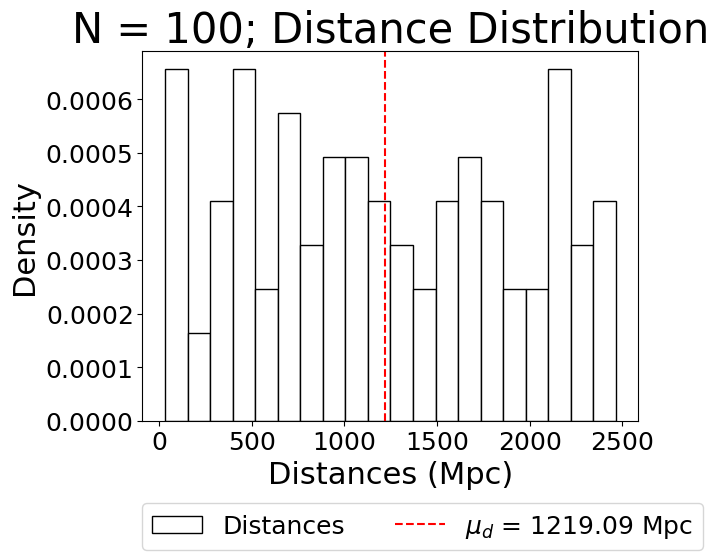

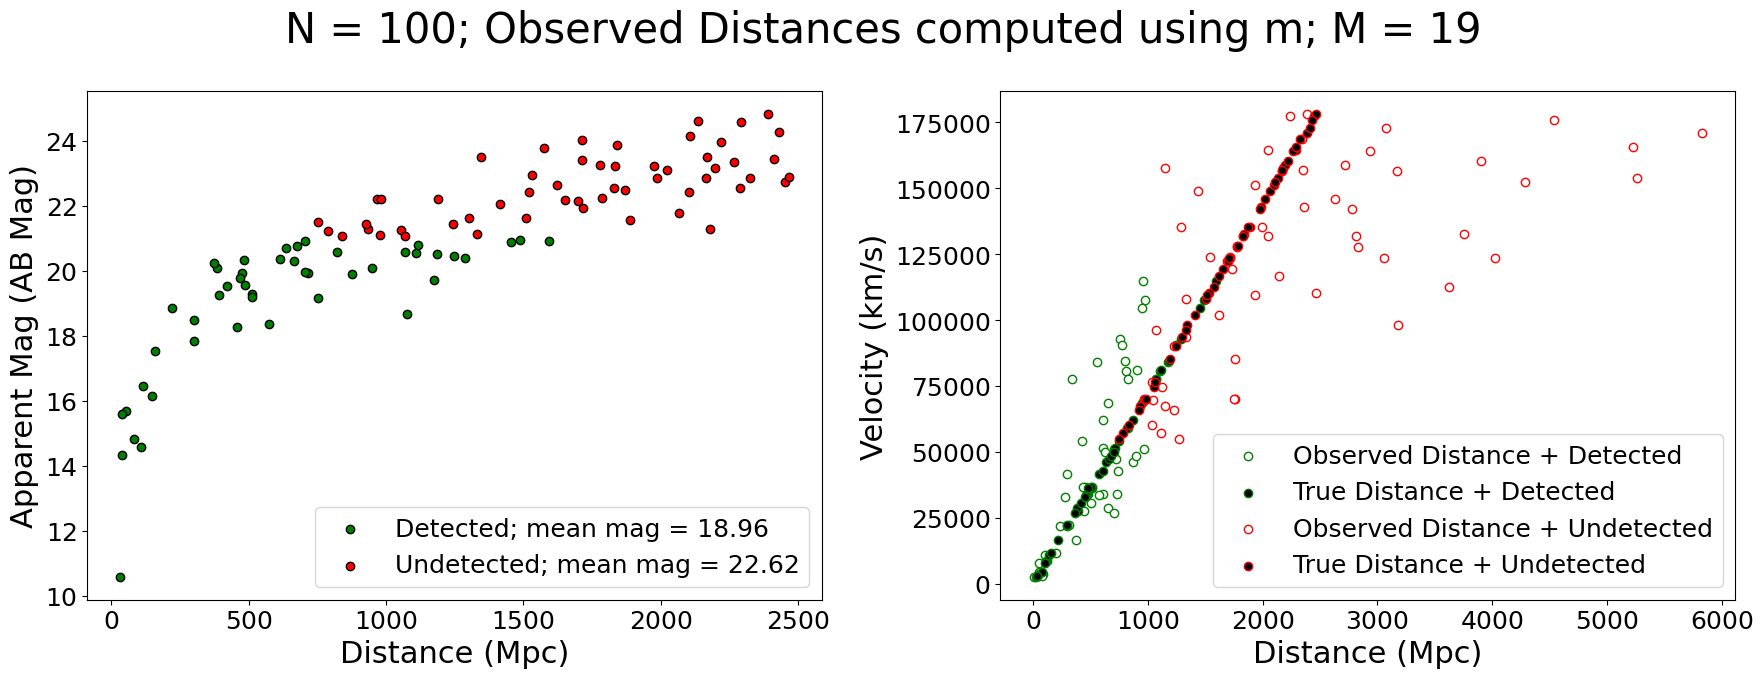

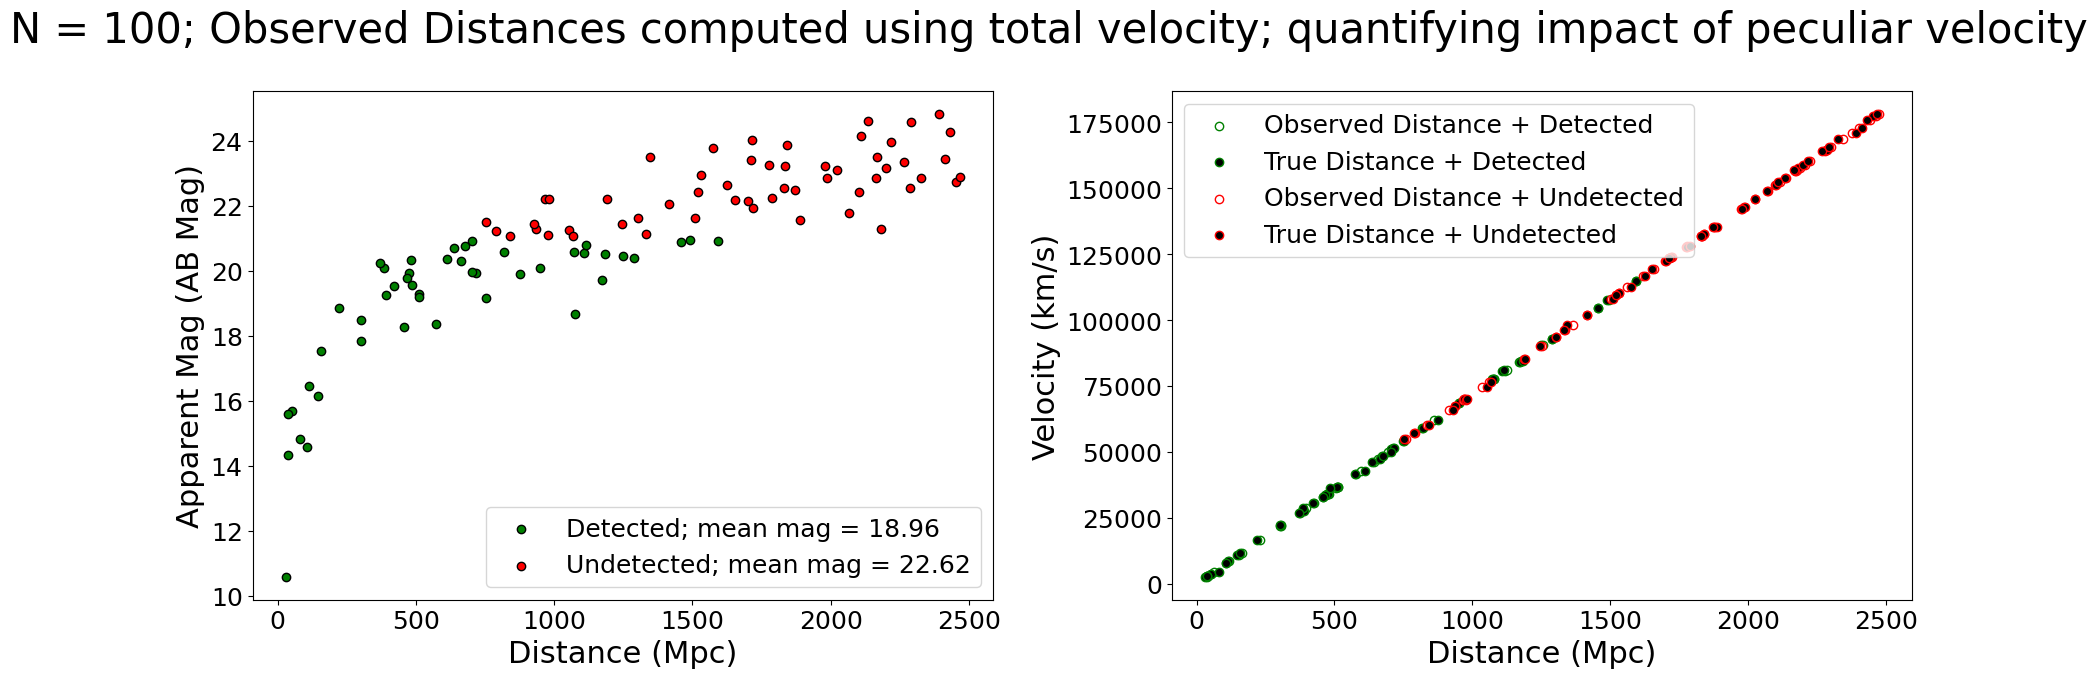

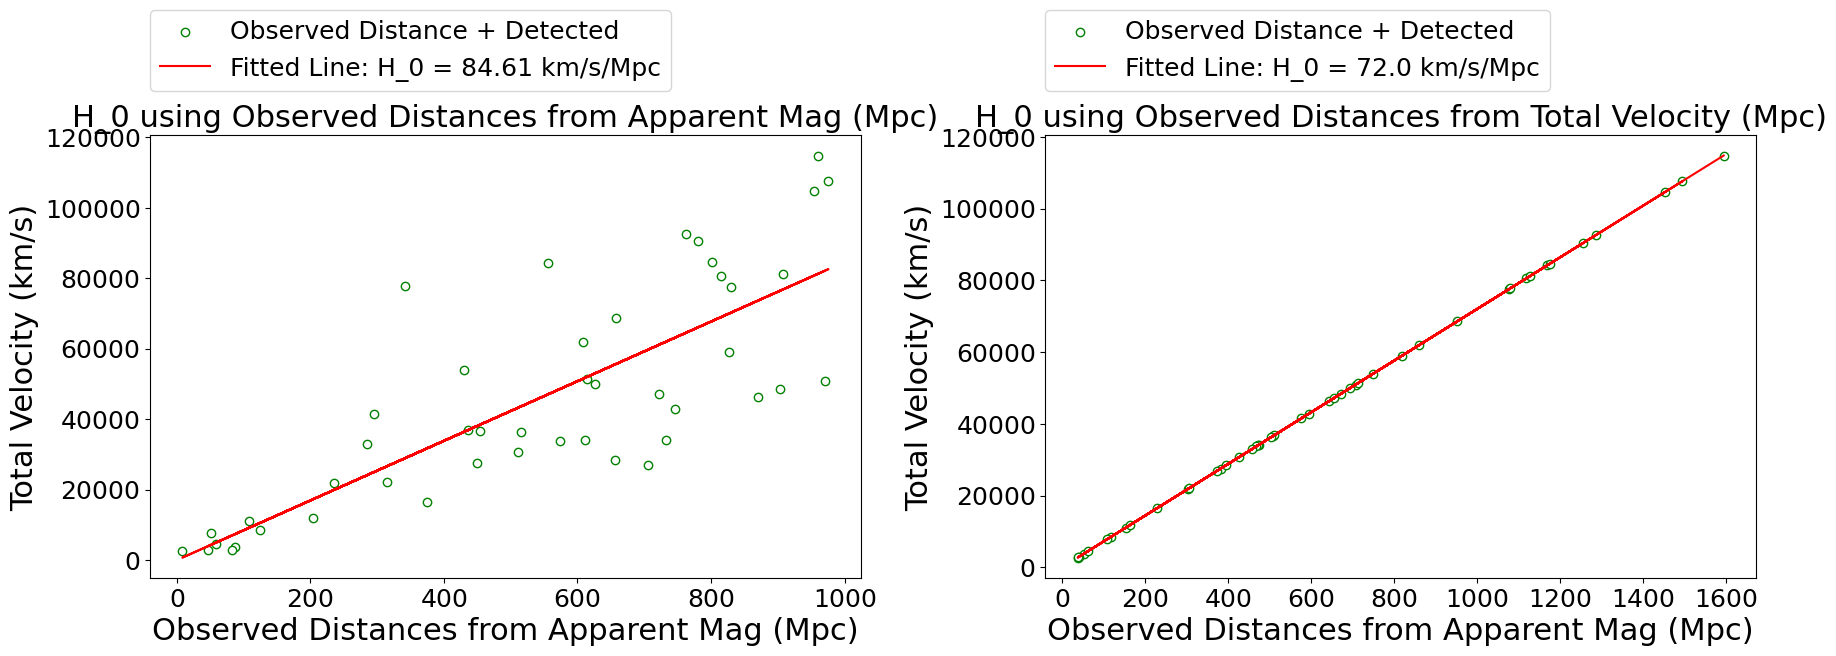

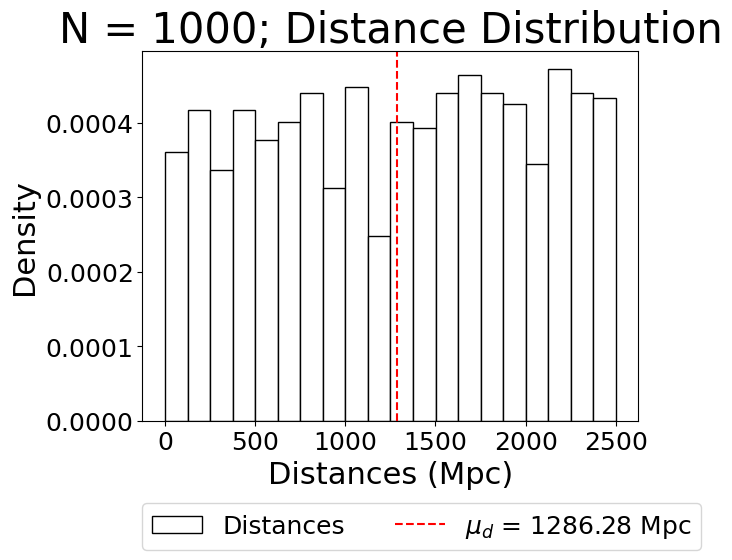

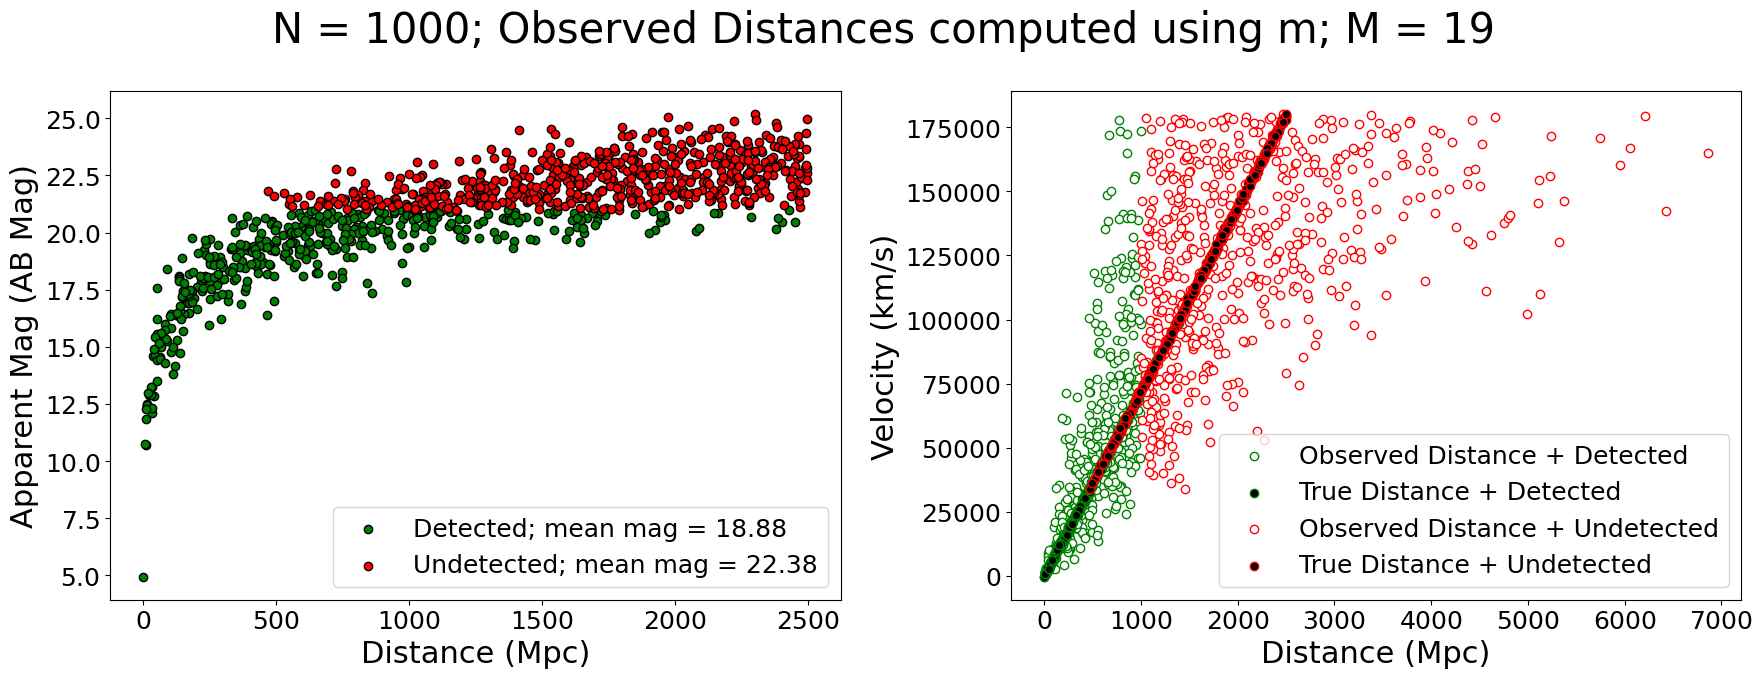

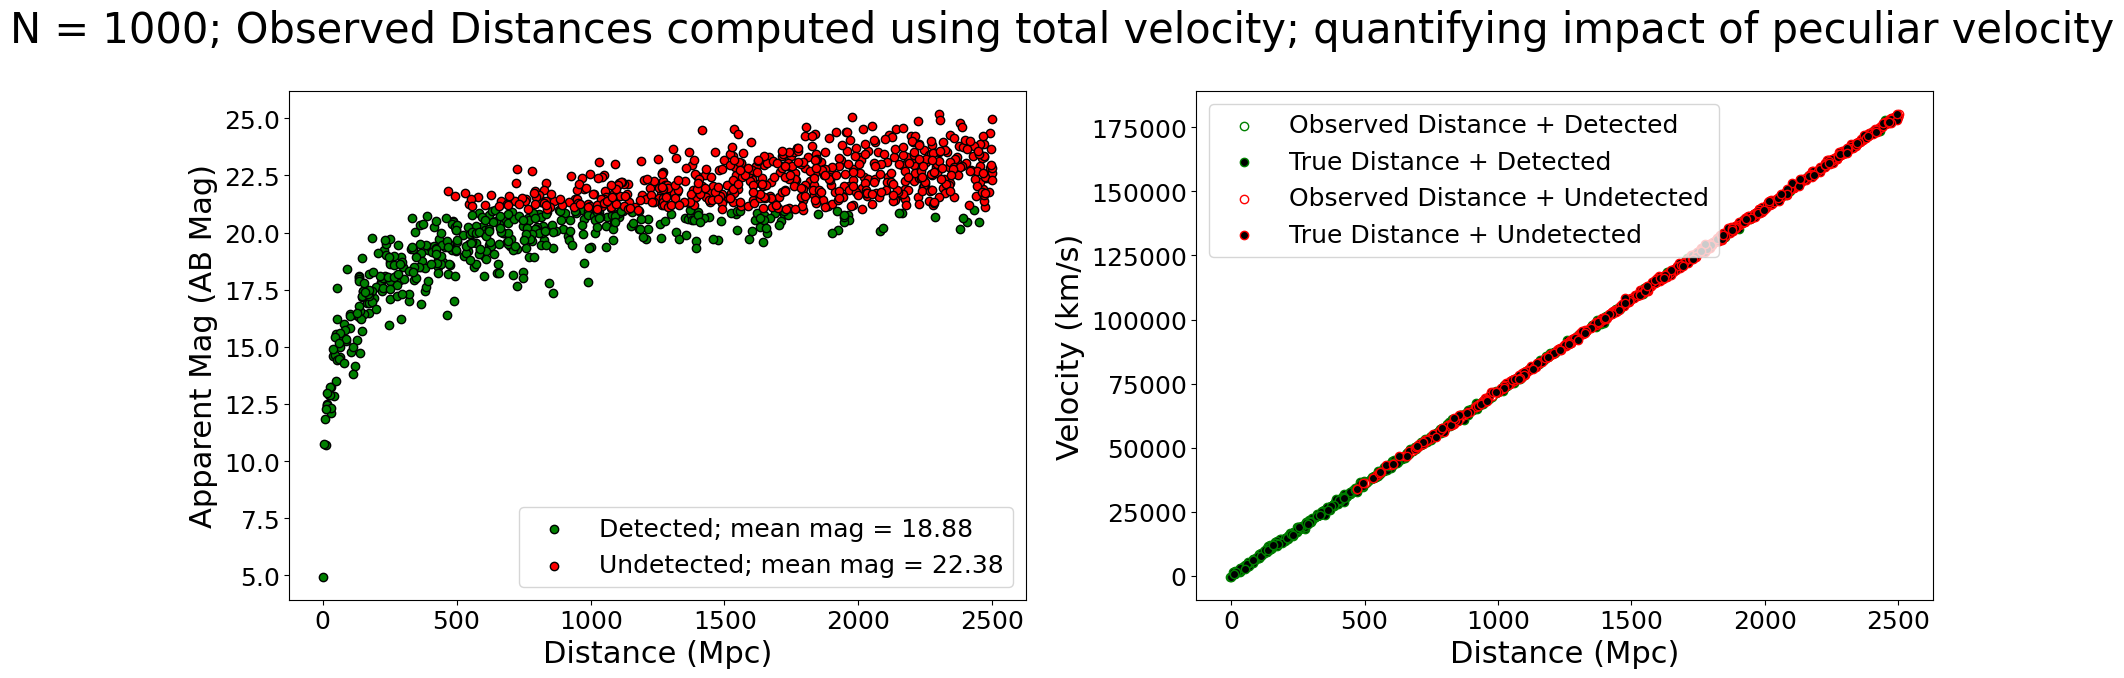

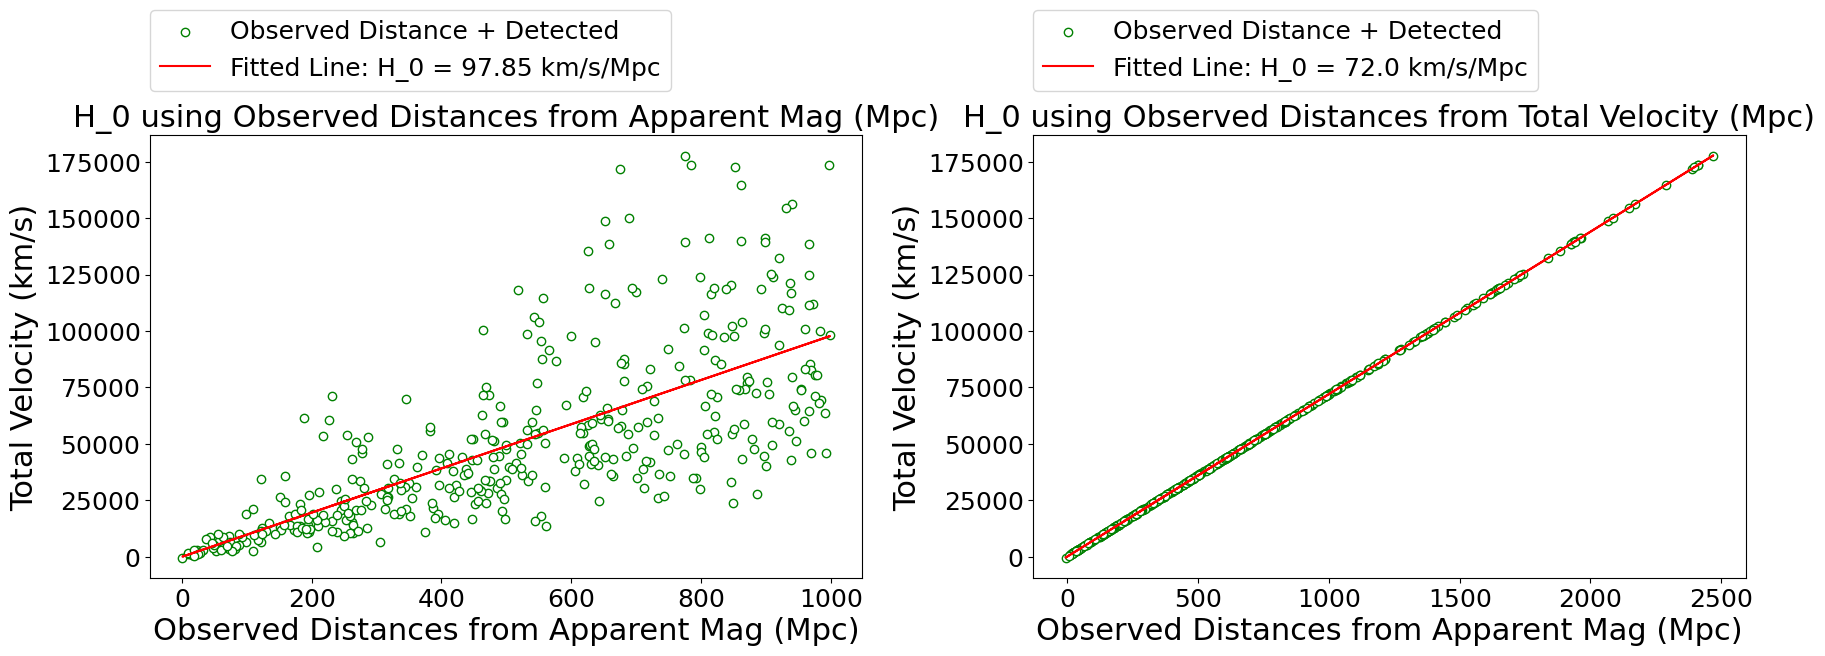

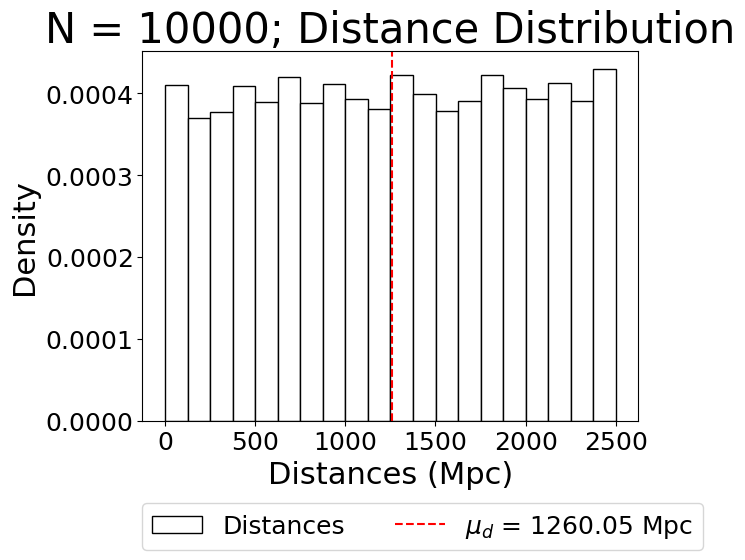

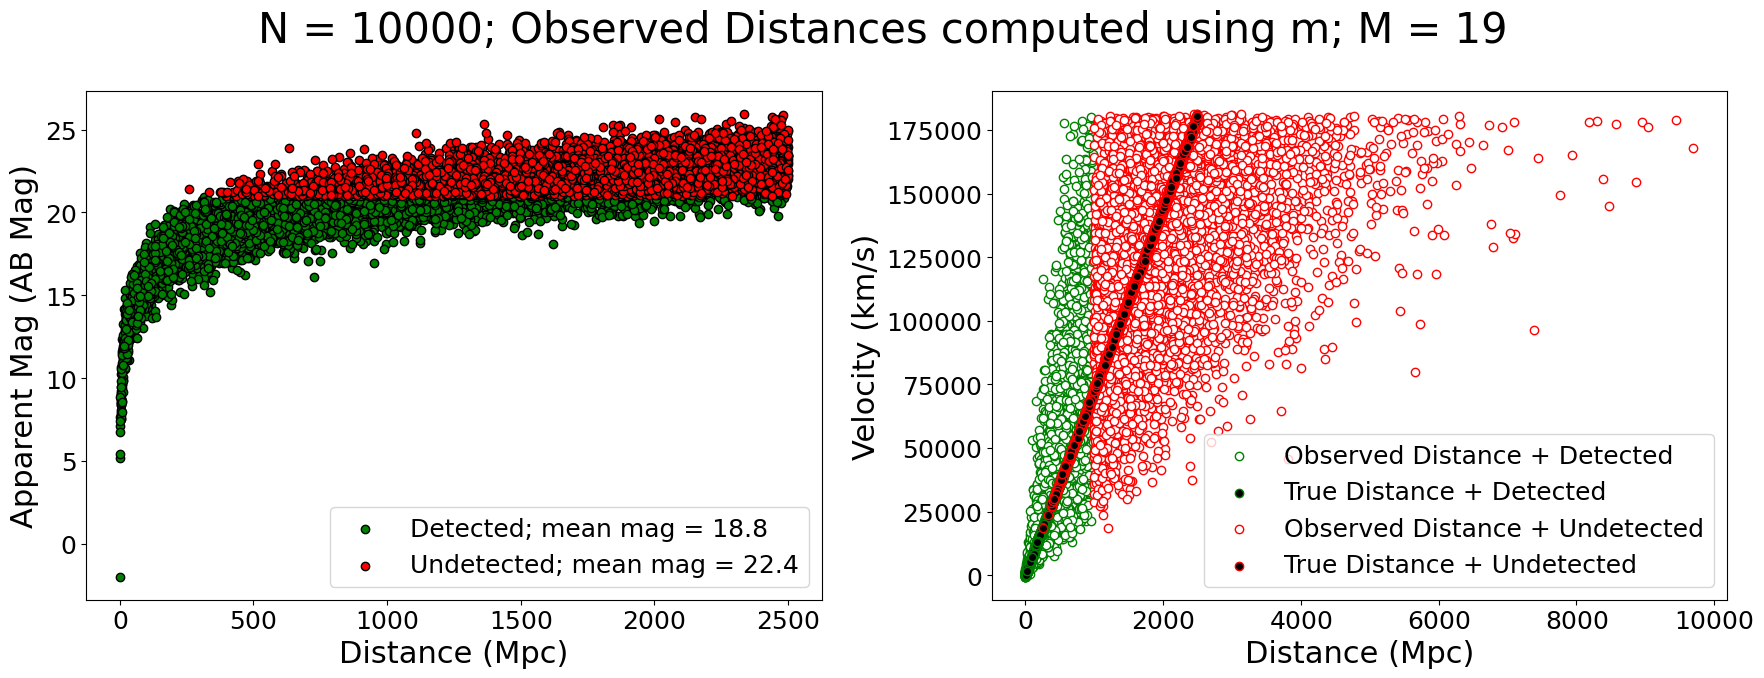

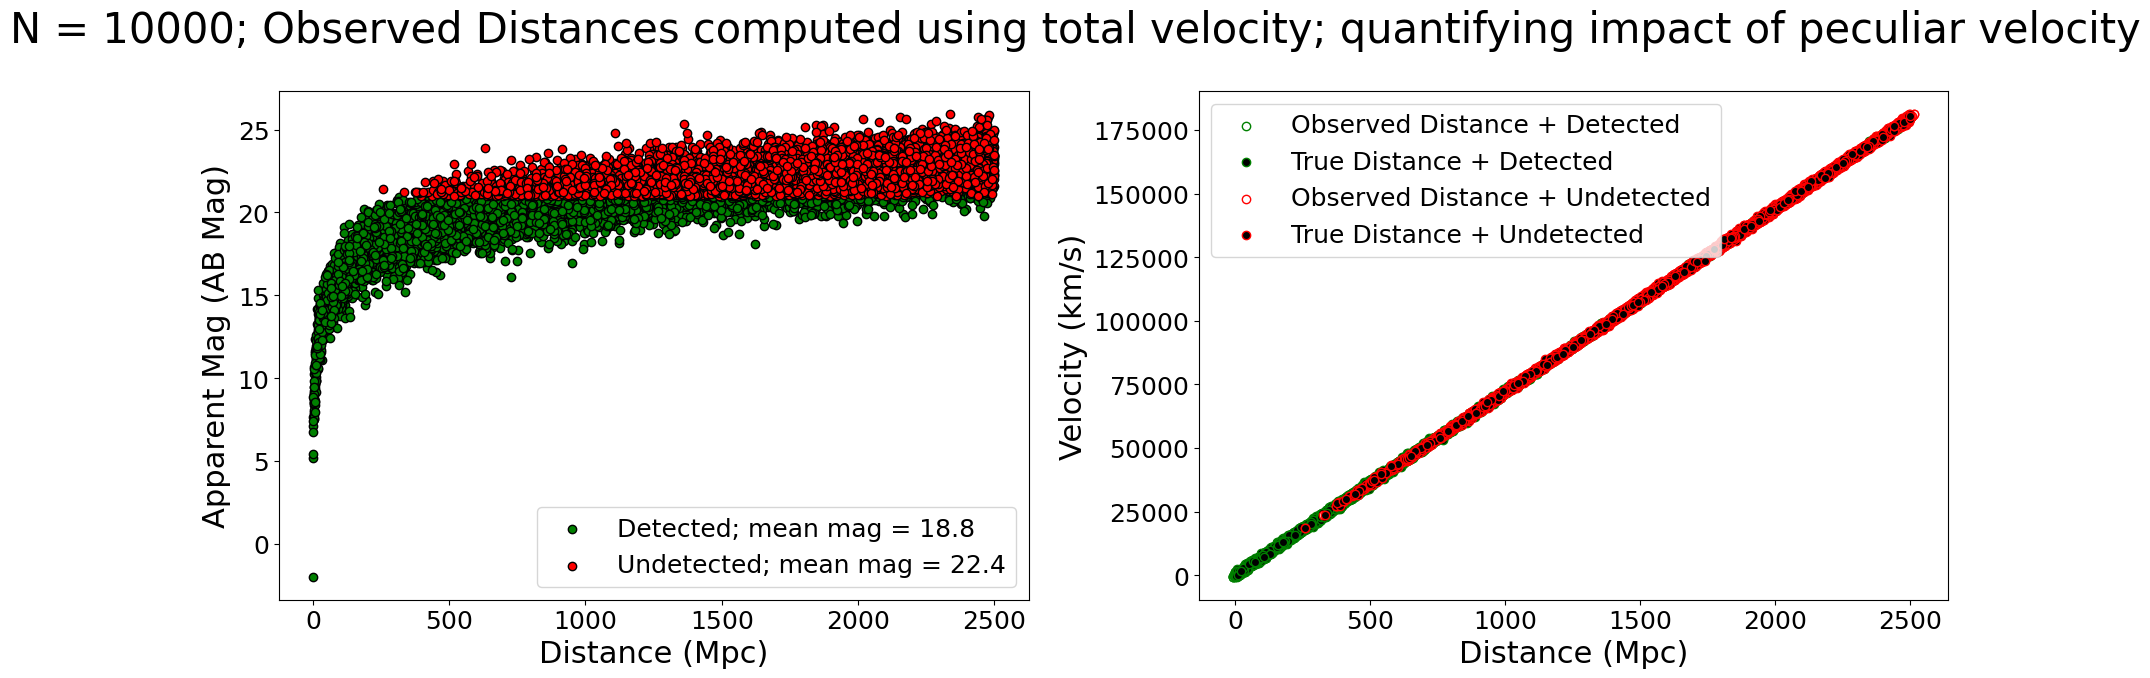

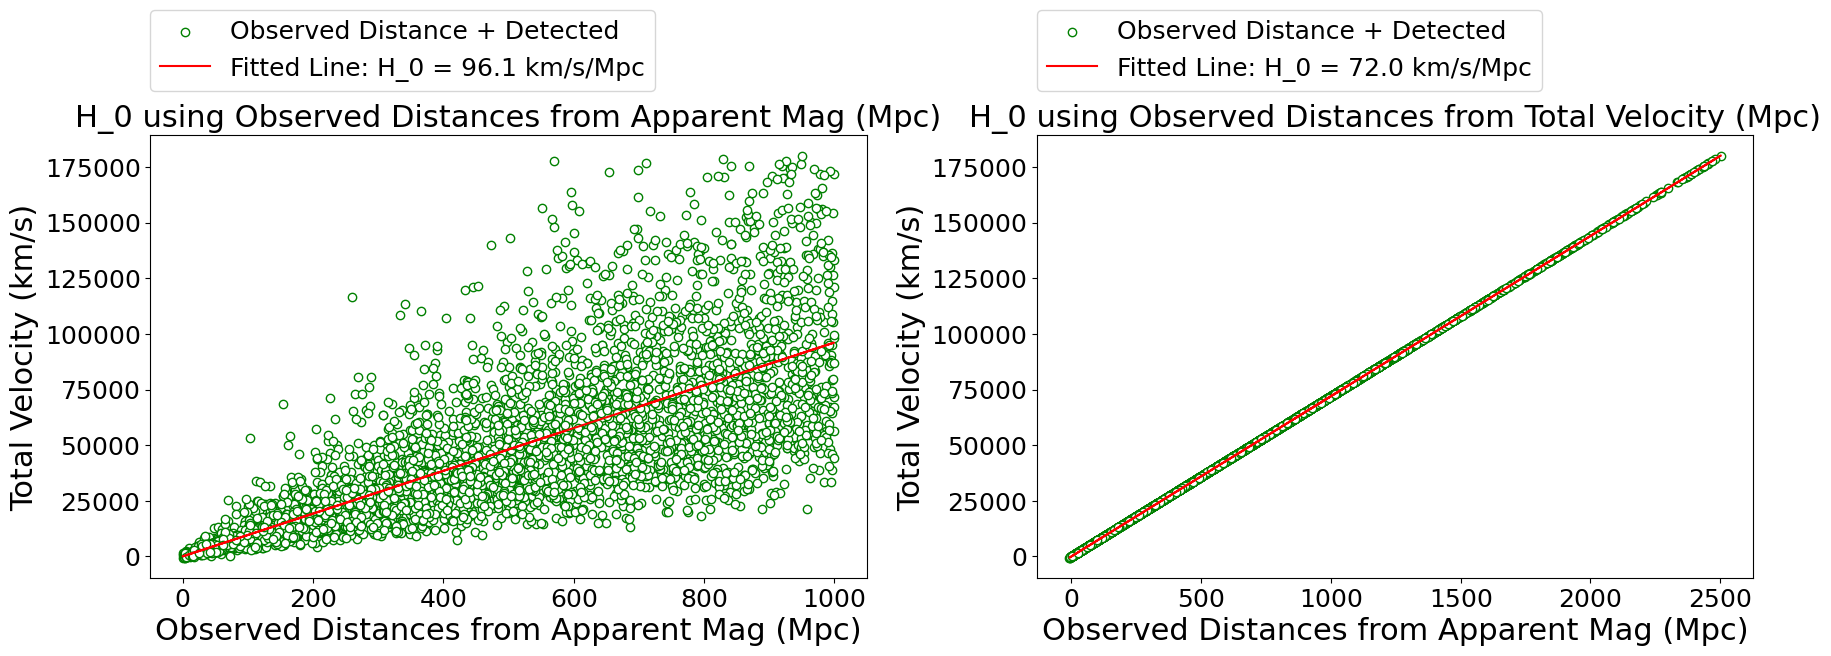

In [196]:
from scipy.optimize import curve_fit
def line(x, a):
    return a * x

for N in [100, 1000, 10000]:
    sne_data = make_SNE_sample(N) 
    distances = sne_data['Distances (Mpc)']
    fig, ax = plt.subplots()
    ax.hist(distances, density=True, label='Distances',bins=20,ec='k',fc='w')
    mean_distances = np.mean(distances )
    ax.axvline(mean_distances, ls='--',color='r',label=f'$\mu_d$ = {np.round(mean_distances, 2)} Mpc')
    ax.set_xlabel("Distances (Mpc)")
    ax.set_ylabel("Density")
    ax.set_title(f"N = {N}; Distance Distribution")
    ax.legend(loc=(0,-0.35), ncols=2)
    fig, (ax,ax1) = plt.subplots(1,2, figsize=(18,7))
    bigmag = (sne_data["Apparent Magnitude (mag)"]>21)

    # _, bins, _ = ax[0].hist(sne_data["Apparent Magnitude (mag)"][bigmag], fc='r',ec='k', bins=10)
    # ax[0].hist(sne_data["Apparent Magnitude (mag)"][~bigmag], fc='g',ec='k', bins=25)
    det = sne_data["Apparent Magnitude (mag)"][~bigmag]
    notdet = sne_data["Apparent Magnitude (mag)"][bigmag]

    ax.scatter(distances[~bigmag], det, ec='k', fc='g', label=f'Detected; mean mag = {np.round(np.mean(det),2)}')
    ax.scatter(distances[bigmag], notdet, ec='k', fc='r', label=f'Undetected; mean mag = {np.round(np.mean(notdet),2)}')
    ax.set_xlabel("Distance (Mpc)")
    ax.set_ylabel("Apparent Mag (AB Mag)")
    ax.legend();

    ax1.scatter(sne_data.iloc[:,6][~bigmag], sne_data['Total Velocity (km/s)'][~bigmag], ec='g', fc='w',label='Observed Distance + Detected')
    ax1.scatter(sne_data.iloc[:,0][~bigmag], sne_data['Total Velocity (km/s)'][~bigmag],ec='g', fc='k',label='True Distance + Detected')
    ax1.scatter(sne_data.iloc[:,6][bigmag], sne_data['Total Velocity (km/s)'][bigmag],ec='r', fc='w', label='Observed Distance + Undetected')
    ax1.scatter(sne_data.iloc[:,0][bigmag], sne_data['Total Velocity (km/s)'][bigmag],ec='r', fc='k', label='True Distance + Undetected')
    ax1.set_xlabel("Distance (Mpc)")
    ax1.set_ylabel("Velocity (km/s)")
    fig.suptitle(f"N = {N}; Observed Distances computed using m; M = 19")
    ax1.legend();
    fig.tight_layout()
    fig, (ax,ax1) = plt.subplots(1,2, figsize=(18,7))


    ax.scatter(distances[~bigmag], det, ec='k', fc='g', label=f'Detected; mean mag = {np.round(np.mean(det),2)}')
    ax.scatter(distances[bigmag], notdet, ec='k', fc='r', label=f'Undetected; mean mag = {np.round(np.mean(notdet),2)}')
    ax.set_xlabel("Distance (Mpc)")
    ax.set_ylabel("Apparent Mag (AB Mag)")
    ax.legend();

    ax1.scatter(sne_data.iloc[:,7][~bigmag], sne_data['Total Velocity (km/s)'][~bigmag], ec='g', fc='w',label='Observed Distance + Detected')
    ax1.scatter(sne_data.iloc[:,0][~bigmag], sne_data['Total Velocity (km/s)'][~bigmag],ec='g', fc='k',label='True Distance + Detected')
    ax1.scatter(sne_data.iloc[:,7][bigmag], sne_data['Total Velocity (km/s)'][bigmag],ec='r', fc='w', label='Observed Distance + Undetected')
    ax1.scatter(sne_data.iloc[:,0][bigmag], sne_data['Total Velocity (km/s)'][bigmag],ec='r', fc='k', label='True Distance + Undetected')
    ax1.set_xlabel("Distance (Mpc)")
    ax1.set_ylabel("Velocity (km/s)")
    fig.suptitle(f"N = {N}; Observed Distances computed using total velocity; quantifying impact of peculiar velocity")
    ax1.legend();
    fig.tight_layout()
    
    fig, (ax,ax1) = plt.subplots(1,2,figsize=(18,7))
    y_data = sne_data['Total Velocity (km/s)'][~bigmag]
    x_data = sne_data['Observed Distances from Apparent Mag (Mpc)'][~bigmag]
    # Fit the line to the data
    popt, pcov = curve_fit(line, x_data, y_data)

    # Extract the fitted parameters
    a = popt

    # Plot the data and the fitted line
    ax.scatter(x_data, y_data, label="Observed Distance + Detected", ec='g', fc='w',)
    ax.plot(x_data, line(x_data, a), color='red', label=f"Fitted Line: H_0 = {np.round(a[0],2)} km/s/Mpc")
    ax.set_xlabel("Observed Distances from Apparent Mag (Mpc)")
    ax.set_ylabel("Total Velocity (km/s)")
    ax.set_title("H_0 using Observed Distances from Apparent Mag (Mpc)",size=MEDIUM_SIZE)
    ax.legend(loc=(0,1.1))

    y_data = sne_data['Total Velocity (km/s)'][~bigmag]
    x_data = sne_data['Observed Distances from Total Velocity (Mpc)'][~bigmag]
    # Fit the line to the data
    popt, pcov = curve_fit(line, x_data, y_data)

    # Extract the fitted parameters
    a = popt
    ax1.scatter(x_data, y_data, label="Observed Distance + Detected", ec='g', fc='w',)
    ax1.plot(x_data, line(x_data, a), color='red', label=f"Fitted Line: H_0 = {np.round(a[0],2)} km/s/Mpc")
    ax1.set_xlabel("Observed Distances from Apparent Mag (Mpc)")
    ax1.set_ylabel("Total Velocity (km/s)")
    ax1.set_title("H_0 using Observed Distances from Total Velocity (Mpc)",size=MEDIUM_SIZE)
    ax1.legend(loc=(0,1.1))
    fig.tight_layout()


\begin{equation*}
v = H_0 * d
\end{equation*}

We end up finding that we're biased to a $H_0$ value that is much higher than the truth (72 km/s/Mpc)

##### Impact of peculiar velocity: computing the distance using total velocity / H_0 gives us pretty much the same as true distance --> adding peculiar velocity to recession velocity and then computing distance has little impact on distance measurement.

##### Impact of asserting that the absolute magnitude of all object is 19: We end up with a spread of distances around the true distance value --> there is heteroscedasticity in this scatter, so by removing the fainter "undetected" objects, we'll end up with object that have a smaller spread of observed distances --> better H_0.

### Divide and conquer, so you encounter issues in parallel and can explain things to each other, rather than working in series. 

# Due Oct 1 at Noon!